# Florida UO2 ThO2 Mixture Assignment: 16OCt

In [2]:
%matplotlib inline
import openmc

## Define Materials

In [3]:
# Establish Thorium Oxide Fuel Mixture Component material (unused)
uo2 = openmc.Material(name='uo2')


In [4]:
# add nuclides to uo2
uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16', 2.0)

In [5]:
# set UO2 Density (based on TRISO Density of 10.5 g/cm^3)
uo2.set_density('g/cm3', 10.5)

In [6]:
# Establish Thorium Oxide Fuel Mixture Component material (unused)
tho2 = openmc.Material(name='tho2')
print(tho2)

Material
	ID             =	2
	Name           =	tho2
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       



In [7]:
fuel = openmc.Material(name='fuel');
#The below ratios were calculated assuming 95%LEU-5%Th Oxide Fuel.
fuel.add_nuclide('Th232', 0.04734, 'ao')
fuel.add_nuclide('U235', 0.04821, 'ao') #5% U-235 enrichment
fuel.add_nuclide('U238', 0.90445, 'ao')
fuel.add_element('O', 2.0)
fuel.set_density('g/cm3', 10.46) # BAsed on assumption of fuel density within TRISO
print(fuel)

Material
	ID             =	3
	Name           =	fuel
	Temperature    =	None
	Density        =	10.46 [g/cm3]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       
	Th232          =	0.04734      [ao]
	U235           =	0.04821      [ao]
	U238           =	0.90445      [ao]
	O16            =	1.999242     [ao]
	O17            =	0.000758     [ao]



In [8]:
# add nuclides to tho2
tho2.add_nuclide('Th232', 0.9998)
tho2.add_nuclide('Th230', 0.0002)
tho2.add_nuclide('O16', 2.0)

In [9]:
# set ThO2 Density (based on TRISO UO2 Density of 10.5 g/cm^3, assumption that density is distributed)
tho2.set_density('g/cm3', 9.7)

In [10]:
# Establish Graphite Moderator material
graph = openmc.Material(name='graph')
print(graph)

Material
	ID             =	4
	Name           =	graph
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       



In [11]:
# add nuclides to graph
graph.add_element('C', 1.00)

In [12]:
# Establish Helium Coolant material
hel_Cool = openmc.Material(name='hel_Cool')
print(hel_Cool)

Material
	ID             =	5
	Name           =	hel_Cool
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       



In [13]:
# add nuclides to hel_Cool
hel_Cool.add_nuclide('He3', 0.000002)
hel_Cool.add_nuclide('He4', 0.999998)

In [14]:
materials = openmc.Materials([uo2, tho2, fuel, graph, hel_Cool])

In [15]:
materials = openmc.Materials()
materials.append(uo2)
materials += [tho2, fuel, graph, hel_Cool]
isinstance(materials,list)

True

## Export Materials as XML

In [16]:
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cm3" value="10.5" />
    <nuclide ao="0.03" name="U235" />
    <nuclide ao="0.97" name="U238" />
    <nuclide ao="2.0" name="O16" />
  </material>
  <material depletable="true" id="2" name="tho2">
    <density units="g/cm3" value="9.7" />
    <nuclide ao="0.9998" name="Th232" />
    <nuclide ao="0.0002" name="Th230" />
    <nuclide ao="2.0" name="O16" />
  </material>
  <material depletable="true" id="3" name="fuel">
    <density units="g/cm3" value="10.46" />
    <nuclide ao="0.04734" name="Th232" />
    <nuclide ao="0.04821" name="U235" />
    <nuclide ao="0.90445" name="U238" />
    <nuclide ao="1.999242" name="O16" />
    <nuclide ao="0.000758" name="O17" />
  </material>
  <material id="4" name="graph">
    <density units="sum" />
    <nuclide ao="1.0" name="C0" />
  </material>
  <material id="5" name="hel_Cool">
    <density units="sum" />
    <nuclide ao="2e

## Define Geometry

In [17]:
r_sphere = 1.0;
sphere = openmc.Sphere(r=r_sphere)

In [18]:
inside_sphere = -sphere
outside_sphere = +sphere

In [19]:
# Test for whether points are within or outside of sphere region
print((0,0,0) in inside_sphere, (0,0,2) in inside_sphere)
print((0,0,0) in outside_sphere, (0,0,2) in outside_sphere)

True False
False True


In [20]:
cell = openmc.Cell()
cell.region = inside_sphere

In [21]:
cell.fill = hel_Cool

## Create Universe

In [22]:
universe = openmc.Universe()
universe.add_cell(cell)

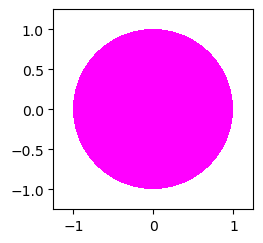

In [23]:
universe.plot(width=(2.5, 2.5), basis='xz', colors={cell: 'fuchsia'})

## Define Bounding Geometry

In [24]:
fuel_outer_rad = openmc.Sphere(r=0.4)
clad_inner_rad = fuel_outer_rad
clad_outer_rad = openmc.Sphere(r=0.5)

In [25]:
fuel_region = -fuel_outer_rad
graph_region = +clad_inner_rad & -clad_outer_rad

In [26]:
fuel_Geom = openmc.Cell(name='fuel_Geom')
fuel_Geom.fill = materials
fuel_Geom.region = fuel_region

graph_Geom = openmc.Cell(name='graph_Geom')
graph_Geom.fill = graph
graph_Geom.region = graph_region

In [27]:
pitch = 2.0

#box = openmc.rectangular_prism(width=pitch, height=pitch, boundary_type='reflective')
#type(box)
box = openmc.model.RectangularParallelepiped(-pitch/2.,pitch/2.,-pitch/2.,pitch/2.,-pitch/2.,pitch/2.,
                                            boundary_type='reflective');

In [28]:
hel_Cool_region = -box & +clad_outer_rad

moderator = openmc.Cell(name='moderator')
moderator.fill = hel_Cool
moderator.region = hel_Cool_region

In [29]:
root_universe = openmc.Universe(cells=(fuel_Geom, graph_Geom, moderator))

geometry = openmc.Geometry()
geometry.root_universe = root_universe
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell id="2" material="1 2 3 4 5" name="fuel_Geom" region="-2" universe="2" />
  <cell id="3" material="4" name="graph_Geom" region="2 -3" universe="2" />
  <cell id="4" material="5" name="moderator" region="-5 4 -7 6 -9 8 3" universe="2" />
  <surface coeffs="0.0 0.0 0.0 0.4" id="2" type="sphere" />
  <surface coeffs="0.0 0.0 0.0 0.5" id="3" type="sphere" />
  <surface boundary="reflective" coeffs="-1.0" id="4" type="x-plane" />
  <surface boundary="reflective" coeffs="1.0" id="5" type="x-plane" />
  <surface boundary="reflective" coeffs="-1.0" id="6" type="y-plane" />
  <surface boundary="reflective" coeffs="1.0" id="7" type="y-plane" />
  <surface boundary="reflective" coeffs="-1.0" id="8" type="z-plane" />
  <surface boundary="reflective" coeffs="1.0" id="9" type="z-plane" />
</geometry>


In [30]:
root_universe.plot(width=(2.5, 2.5), basis='xz', colors={cell: 'fuchsia'})

RuntimeError: Cell 2 was specified with 5 materials but has 1 distributed instances. The number of materials must equal one or the number of instances.

## Cross Sections

In [ ]:
!cat $OPENMC_CROSS_SECTIONS | head -n 10
print('    ...')
!cat $OPENMC_CROSS_SECTIONS | tail -n 10

## Source

In [ ]:
# create a point source
point = openmc.stats.Point((0,0,0))
source = openmc.Source(space=point)


In [ ]:
settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

In [ ]:
settings.export_to_xml()
!cat settings.xml

In [ ]:
## Tallies

In [ ]:
cell_filter = openmc.CellFilter(fuel_Geom)

tally = openmc.Tally(1)
tally.filters = [cell_filter]

In [ ]:
tally.nuclides = ['U235']
tally.scores = ['total','fission','absorption','(n,gamma)']

In [ ]:
tallies = openmc.Tallies([tally])
tallies.export_to_xml()
!cat tallies.xml

In [ ]:
openmc.run()

In [ ]:
!cat tallies.out

## Plot Geometry

In [ ]:
plot = openmc.Plot()
plot.filename = 'pinplot'
plot.width = (pitch,pitch)
plot.pixels = (200,200)
plot.color_by = 'material'
plot.colors = {fuel: 'yellow',hel_Cool: 'blue'}

In [ ]:
plots = openmc.Plots([plot])
plots.export_to_xml()
!cat plots.xml

In [ ]:
openmc.plot_geometry()

In [ ]:
from IPython.display import Image
Image('pinplot.png')

In [ ]:
plot.to_ipython_image()